In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv("insurance.csv")

data.columns = data.columns.str.strip()
data.rename(columns={'expenses': 'charges'}, inplace=True)

encoder = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    data[col] = encoder.fit_transform(data[col])

X = data.drop(columns=['charges'])
y = data['charges']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 MSE: {mse:.2f} | R² Score: {r2:.4f}")


📊 MSE: 33639075.09 | R² Score: 0.7833


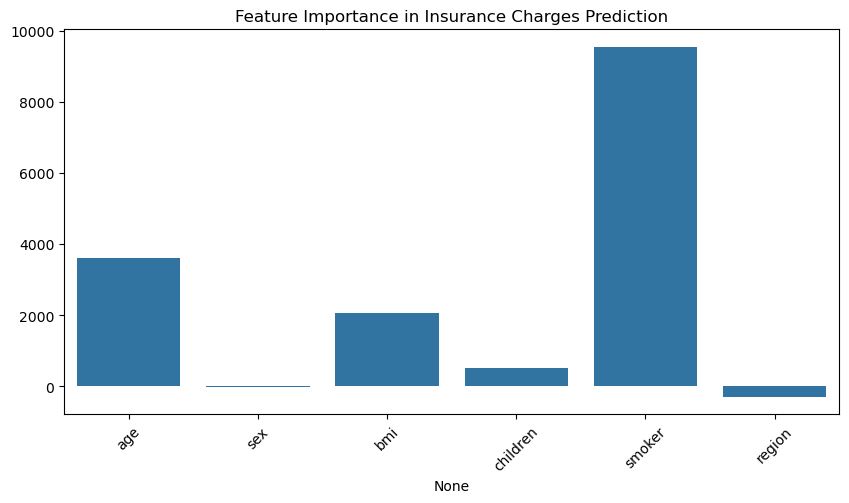

In [4]:
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=model.coef_)
plt.xticks(rotation=45)
plt.title("Feature Importance in Insurance Charges Prediction")
plt.show()


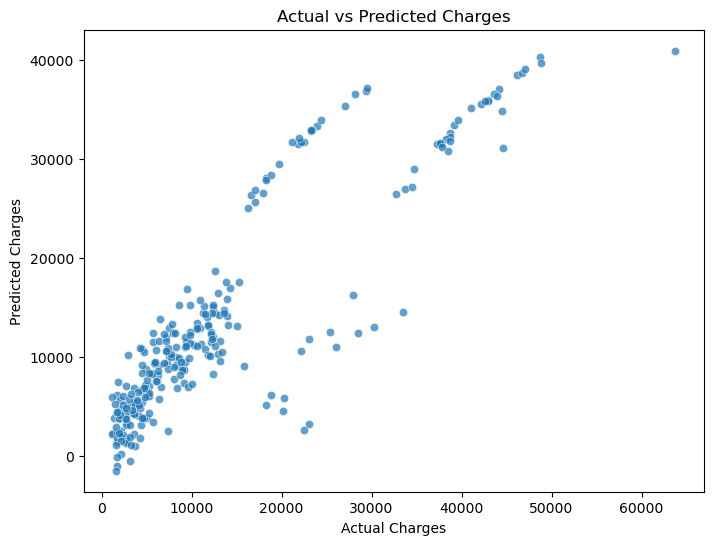

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()


In [6]:
sample_input = pd.DataFrame([[30, 1, 25.3, 2, 0, 1]], columns=X.columns)
sample_input_scaled = scaler.transform(sample_input)
predicted_charge = model.predict(sample_input_scaled)

print(f"💰 Predicted Insurance Charge: ${predicted_charge[0]:.2f}")


💰 Predicted Insurance Charge: $4819.74
